   Unnamed: 0  level  page_num  block_num  par_num  line_num  word_num  left  \
0           4      5         1          1        1         1         1  1091   
1           8      5         1          2        1         1         1   318   
2           9      5         1          2        1         1         2   491   
3          10      5         1          2        1         1         3   549   
4          12      5         1          2        1         2         1   281   

   top  width  height       conf   text     page  
0  211    173      52  96.847725  Прозэ  page-01  
1  373    157     108   0.000000     «Х  page-01  
2  358     41     112  74.923691      I  page-01  
3  373    159     108  70.996452      у  page-01  
4  494     42      42  37.629856      .  page-01  
         Unnamed: 0    level  page_num     block_num       par_num  \
count  25589.000000  25589.0   25589.0  25589.000000  25589.000000   
mean   15530.471374      5.0       1.0      2.527101      6.476181   
std

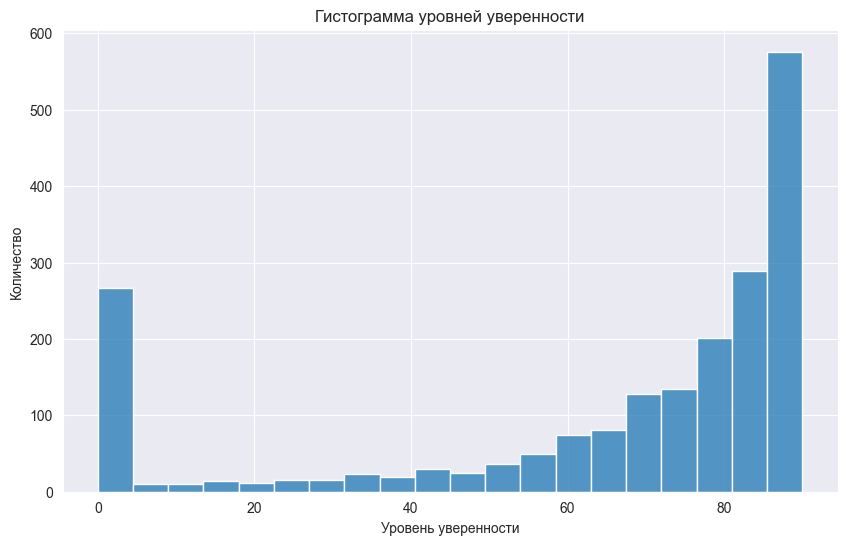

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Users/panagoa/airflow/data/dag_results/pdf_processing/dysche_zhyg.pdf/kbd_0.229_2995_10800_vs_kbd_0.009_4360_66700/book_df_kbd_0.009_4360_66700.tsv', sep='\t')

print(df.head())

print(df.describe())

plt.figure(figsize=(10, 6))
conf_min, conf_max = 0, 90
sns.histplot(df['conf'][df['conf'] >= conf_min][df['conf'] <= conf_max])
plt.title('Гистограмма уровней уверенности')
plt.xlabel('Уровень уверенности')
plt.ylabel('Количество')
# plt.show()
plt.savefig('conf_hist.png')



In [2]:
filtered_df = df.loc[(df['conf'] < 80) & (df['text'].notna())]
sorted_df = filtered_df.sort_values(by=['conf'], ascending=False)
print(sorted_df)


       level  page_num  block_num  par_num  line_num  word_num  left   top  \
13875      5        35          4        2         8         5  1922  1934   
12143      5        31          4        1         1         6  1662   659   
12144      5        31          4        1         1         7  1816   659   
17707      5        44          2       15         1         5  1200  2202   
29563      5        74          2       11         2         4  1383  2256   
...      ...       ...        ...      ...       ...       ...   ...   ...   
28646      5        72          2        8         3         3   908  1648   
18786      5        47          4        1         6         4  1244  1540   
21532      5        54          2        4         3         7  1510  1269   
9106       5        23          2       16         1         8  1633  2567   
384        5         3          1        1         1         1  1088   224   

       width  height       conf             text  
13875     51

In [3]:
sorted_df.to_csv('../test/filtered.tsv', sep='\t', index=False)

In [4]:
print(sorted_df.describe())

        level     page_num    block_num      par_num     line_num  \
count  3513.0  3513.000000  3513.000000  3513.000000  3513.000000   
mean      5.0    39.811842     2.530031     6.763450     4.773982   
std       0.0    22.464795     0.965681     6.367907     5.754332   
min       5.0     1.000000     1.000000     1.000000     1.000000   
25%       5.0    20.000000     2.000000     2.000000     1.000000   
50%       5.0    40.000000     2.000000     4.000000     2.000000   
75%       5.0    60.000000     3.000000    10.000000     6.000000   
max       5.0    78.000000     7.000000    31.000000    50.000000   

          word_num         left          top        width       height  \
count  3513.000000  3513.000000  3513.000000  3513.000000  3513.000000   
mean      3.724737   973.924851  1807.419869   197.066040    38.915742   
std       2.615053   510.175939   807.276102   102.871781     8.801938   
min       1.000000   281.000000   211.000000    14.000000     1.000000   
25%     

<Axes: xlabel='page_num'>

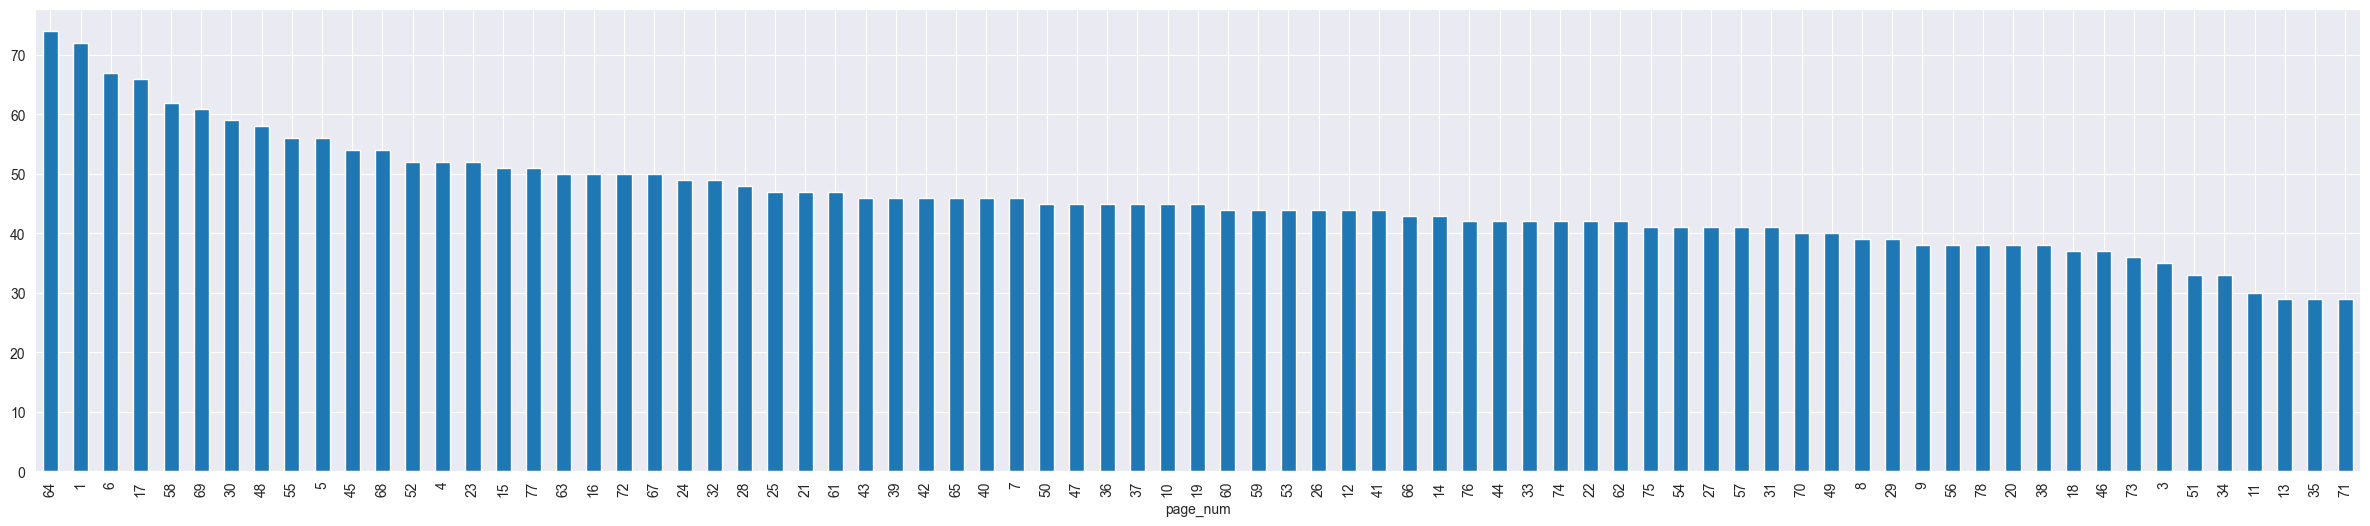

In [6]:
filtered_df['page_num'].value_counts().plot(kind='bar', figsize=(30, 6))

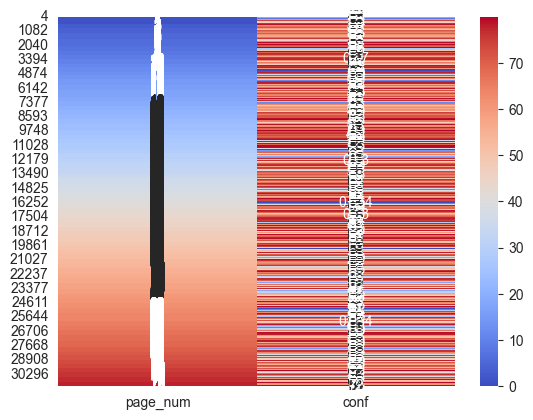

In [12]:
# heatmap plot of page_num vs conf
sns.heatmap(filtered_df[['page_num', 'conf']], annot=True, cmap='coolwarm')
plt.show()